In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("final_clean_data.csv")
df.shape

(10000, 6)

In [3]:
df=df[["clean_text_1","target"]].copy()

In [4]:
df.isnull().sum()

clean_text_1    0
target          0
dtype: int64

In [5]:
df.target.value_counts()

positive    7789
negative    1483
nuetral      728
Name: target, dtype: int64

In [6]:
df=df.loc[~(df.target=="nuetral"),]
df.shape

(9272, 2)

In [7]:
df["clean_text_1"]=df["clean_text_1"].astype(str)

In [14]:
df["target"]=df["target"].map(lambda x: 1 if (x=="positive") else 0)

In [15]:
df.target.value_counts()

1    7789
0    1483
Name: target, dtype: int64

In [16]:
### splt data into train and text
from sklearn.model_selection import train_test_split
x=df.clean_text_1
y=df.target

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1993)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6490,), (6490,), (2782,), (2782,))

In [17]:
### convert word to vector using tf idf 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorize=TfidfVectorizer(ngram_range=(1,3),max_features=2000)

X_train_tfi = vectorize.fit_transform(X_train).toarray() 
X_test_tfi = vectorize.transform(X_test).toarray() 

In [18]:
X_train_tfi.shape

(6490, 2000)

In [19]:
y_test.value_counts()

1    2334
0     448
Name: target, dtype: int64

In [20]:
# Fitting naive bayes to the training set with Gaussian Method
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 
  
classifier_GNB = GaussianNB(); 
classifier_GNB.fit(X_train_tfi, y_train) 
cv_gaussian= classifier_GNB.fit(X_train_tfi, y_train) # This will be used later for model comparison
  
# predicting test set results 
y_pred = classifier_GNB.predict(X_test_tfi) 
  
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm 


array([[ 345,  103],
       [1040, 1294]], dtype=int64)

Text(91.68, 0.5, 'Predicted label')

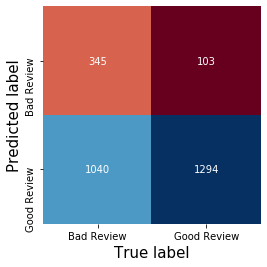

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d', # fmt='d' gets rid of numbers like 1.8e + 02
xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15)